In [7]:
import numpy as np
import joy

### Mean Squared Error

In [14]:
def MSEcost(A2, Y):
    E2 = Y -  A2
    cost = np.sqrt(np.sum(E2 * E2))
    return cost 

In [17]:
A2 = np.array([[.1, .2, .7], [.1, .7, .2], [.3, .4, .3]])
Y = np.array([[0,0,1],[0,1,0],[1,0,0]])
np.sum((Y-A2)**2)/3

0.34

### CrossEntropy Error

In [6]:
def CEcost(self, A2, Y):
    m = Y.shape[1] #number of example
    logprobs = np.multiply(Y, np.log(A2))
    cost = -np.sum(logprobs) / m
    cost = np.squeeze(cost) 
    return cost

In [7]:
def softmax(self, a):
    exp_a = np.exp(a - np.max(a))
    return exp_a / np.sum(exp_a)

In [8]:
import matplotlib.pyplot as plt 
import numpy as np

class LogisticNeuron_stochastic(object):
    def __init__(self, n_x, n_h, n_y, eta = 0.2, epochs = 5, random_seed=1):
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
        
        np.random.seed(self.random_seed)
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1
        self.b1 = np.zeros((self.n_h, 1))
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1      
        self.b2 = np.zeros((self.n_y, 1))
        self.W1 = 2*np.random.random((self.n_h, self.n_x)) - 1  
        self.W2 = 2*np.random.random((self.n_y, self.n_h)) - 1  
        
    def CEcost(self, A2, Y):
        m = Y.shape[1] 
        logprobs = np.multiply(Y, np.log(A2))
        cost = -np.sum(logprobs)/m
        cost = np.squeeze(cost)        
        return cost  
    
    def forpass(self, A0):
        Z1 = np.dot(self.W1, A0) + self.b1         
        A1 = self.g(Z1)                          
        Z2 = np.dot(self.W2, A1) + self.b2       
        A2 = self.softmax(Z2)                   
        return Z1, A1, Z2, A2

    def fit(self, X, y): 
        self.cost_ = []
        self.m_samples = len(y)
        Y = joy.one_hot_encoding(y, self.n_y)    
               
        for epoch in range(self.epochs):           
            for sample in range(self.m_samples):            
                A0 = np.array(X[sample], ndmin=2).T  
                Y0 = np.array(Y[sample], ndmin=2).T  

                Z1, A1, Z2, A2 = self.forpass(A0)    
                
                cost = self.CEcost(A2, Y0)
                self.cost_.append(cost)
                E2 = Y0 - A2                
                dZ2 = E2 
                dW2 = np.dot(dZ2, A1.T) / self.m_samples
                db2 = np.sum(dZ2, axis=1, keepdims=True) / self.m_samples
                
                E1 = np.dot(self.W2.T, E2)  
                dZ1 = E1 * self.g_prime(Z1) 
                dW1 = np.dot(dZ1, A0.T) 
                db1 = np.sum(dZ1, axis=1, keepdims=True) 
                
                self.W1 += self.eta * dW1 
                self.b1 += self.eta * db1 
                self.W2 += self.eta * dW2 
                self.b2 += self.eta * db2 
            print('Training epoch {}/{}, cost = {}'.format(epoch+1, self.epochs, cost))
        return self

    def predict(self, X):
        A0 = np.array(X, ndmin=2).T        
        Z1, A1, Z2, A2 = self.forpass(A0)  
        return A2  

    def g(self, x):               
        x = np.clip(x, -500, 500) 
        return 1.0/(1.0+np.exp(-x))
                                   

    def g_prime(self, x):          
        return self.g(x) * (1 - self.g(x))
    
    def softmax(self, a):       
        exp_a = np.exp(a - np.max(a))
        return exp_a / np.sum(exp_a)
    
    def evaluate(self, Xtest, ytest): 
        m_samples = len(ytest)  
        A2 = self.predict(Xtest)
        yhat = np.argmax(A2, axis = 0)
        scores = np.sum(yhat == ytest)
        return scores/m_samples * 100

In [10]:
(X, y), (Xtest, ytest) = joy.load_mnist()
self_accuracy = []
test_accuracy = []
epoch_list = np.arange(1, 5)
for e in epoch_list:
    nn = joy.LogisticNeuron_stochastic(784, 100, 10, eta = 0.2, epochs = e)  
    nn.fit(X, y)       
    self_accuracy.append(nn.evaluate(X, y))
    test_accuracy.append(nn.evaluate(Xtest, ytest))

Training epoch 1/1, cost = 0.6030753688254945
Training epoch 1/2, cost = 0.6030753688254945
Training epoch 2/2, cost = 0.5487202658185626
Training epoch 1/3, cost = 0.6030753688254945
Training epoch 2/3, cost = 0.5487202658185626
Training epoch 3/3, cost = 0.563116486742796
Training epoch 1/4, cost = 0.6030753688254945
Training epoch 2/4, cost = 0.5487202658185626
Training epoch 3/4, cost = 0.563116486742796
Training epoch 4/4, cost = 0.5933841742745642


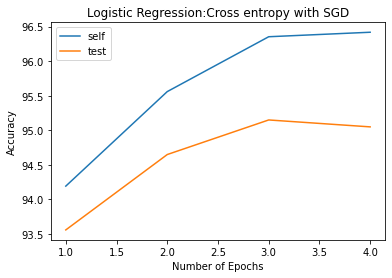

In [12]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, self_accuracy, label='self')
plt.plot(epoch_list, test_accuracy, label='test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression:Cross entropy with SGD')
plt.legend(loc='best')
plt.show()